<a href="https://colab.research.google.com/github/tszabad/machine_learning/blob/main/Copy_of_Time_series_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#New extended hemispheric sunspot numbers


<img src="https://www.almanac.com/sites/default/files/styles/primary_image_in_article/public/image_nodes/sunspots.jpg?itok=6Fx0Px0U">

#Task1

Download and load the monthly data!

In [ ]:
!wget -O sunspot.csv http://www.sidc.be/silso/INFO/snmtotcsv.php

--2021-07-29 17:20:11--  http://www.sidc.be/silso/INFO/snmtotcsv.php
Resolving www.sidc.be (www.sidc.be)... 193.190.230.45
Connecting to www.sidc.be (www.sidc.be)|193.190.230.45|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://wwwbis.sidc.be/silso/INFO/snmtotcsv.php [following]
--2021-07-29 17:20:11--  https://wwwbis.sidc.be/silso/INFO/snmtotcsv.php
Resolving wwwbis.sidc.be (wwwbis.sidc.be)... 193.190.230.16
Connecting to wwwbis.sidc.be (wwwbis.sidc.be)|193.190.230.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘sunspot.csv’

sunspot.csv             [    <=>             ] 121.35K   157KB/s    in 0.8s    

2021-07-29 17:20:13 (157 KB/s) - ‘sunspot.csv’ saved [124260]



#Task 2

Perform "exploratory" analysis on the data, using descriptors and graphs to present its main features!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df = pd.read_csv("sunspot.csv")
df

,1749;01;1749.042; 96.7; -1.0; -1;1
0,1749;02;1749.123; 104.3; -1.0; -1;1
1,1749;03;1749.204; 116.7; -1.0; -1;1
2,1749;04;1749.288; 92.8; -1.0; -1;1
3,1749;05;1749.371; 141.7; -1.0; -1;1
4,1749;06;1749.455; 139.2; -1.0; -1;1
...,...
3264,2021;02;2021.122; 8.3; 4.2; 959;0
3265,2021;03;2021.204; 17.3; 6.0; 1157;0
3266,2021;04;2021.286; 24.5; 6.8; 1277;0
3267,2021;05;2021.371; 21.2; 5.4; 1237;0


In [ ]:
df = pd.read_csv("sunspot.csv",names = ["year", "month","fraction_year", "total_sunspot","daily_std","observations",  "definitive"],header = None, sep=";")
display(df)

,year,month,fraction_year,total_sunspot,daily_std,observations,definitive
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1
...,...,...,...,...,...,...,...
3265,2021,2,2021.122,8.3,4.2,959,0
3266,2021,3,2021.204,17.3,6.0,1157,0
3267,2021,4,2021.286,24.5,6.8,1277,0
3268,2021,5,2021.371,21.2,5.4,1237,0


In [ ]:
df["date"] = df.apply(lambda x:'%s-%s' % (x['year'].astype(int),x['month'].astype(int)),axis=1).astype(str)
df

,year,month,fraction_year,total_sunspot,daily_std,observations,definitive,date
0,1749,1,1749.042,96.7,-1.0,-1,1,1749-1
1,1749,2,1749.123,104.3,-1.0,-1,1,1749-2
2,1749,3,1749.204,116.7,-1.0,-1,1,1749-3
3,1749,4,1749.288,92.8,-1.0,-1,1,1749-4
4,1749,5,1749.371,141.7,-1.0,-1,1,1749-5
...,...,...,...,...,...,...,...,...
3265,2021,2,2021.122,8.3,4.2,959,0,2021-2
3266,2021,3,2021.204,17.3,6.0,1157,0,2021-3
3267,2021,4,2021.286,24.5,6.8,1277,0,2021-4
3268,2021,5,2021.371,21.2,5.4,1237,0,2021-5


In [ ]:
df.date = pd.to_datetime(df.date)
df.dtypes

year                      int64
month                     int64
fraction_year           float64
total_sunspot           float64
daily_std               float64
observations              int64
definitive                int64
date             datetime64[ns]
dtype: object

In [ ]:
df = df[["date", "total_sunspot"]]
df.set_index("date", inplace = True)
df

,total_sunspot
date,
1749-01-01,96.7
1749-02-01,104.3
1749-03-01,116.7
1749-04-01,92.8
1749-05-01,141.7
...,...
2021-02-01,8.3
2021-03-01,17.3
2021-04-01,24.5


Populating the interactive namespace from numpy and matplotlib


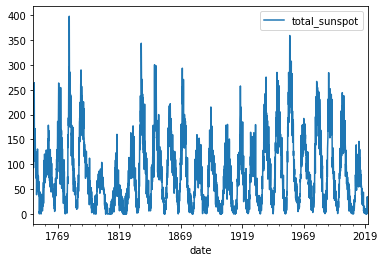

In [ ]:
%pylab inline
df.plot()


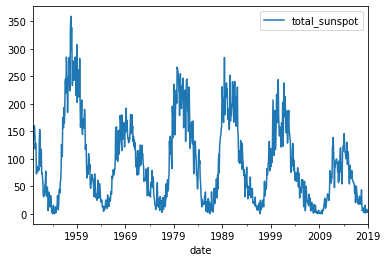

In [ ]:
df['1950-01':'2019-1'].plot()

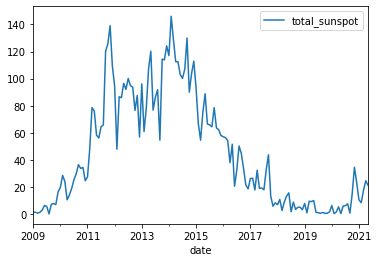

In [ ]:
df[-150:-1].plot()

In [ ]:
df.describe()

,total_sunspot
count,3270.000000
mean,81.683914
std,67.881127
min,0.000000
25%,23.825000
50%,67.000000
75%,122.475000
max,398.200000


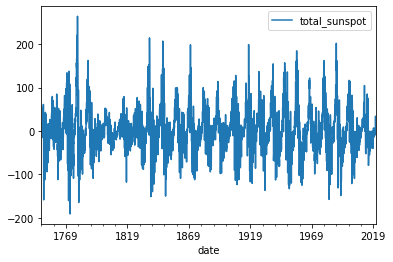

In [ ]:
df.diff(12).plot()

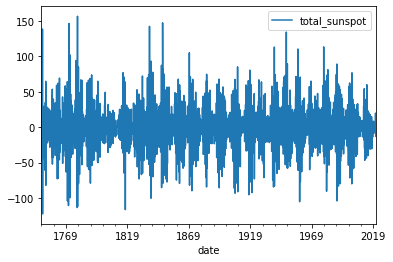

In [ ]:
df.diff(1).plot()

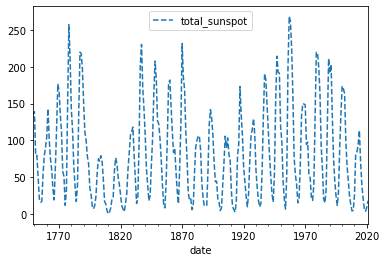

In [ ]:
df.resample("AS").mean().plot(style='--')

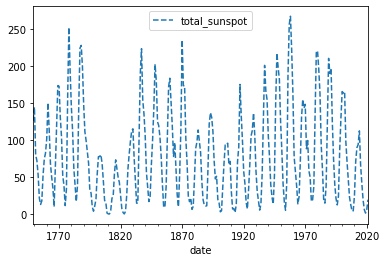

In [ ]:
df.resample("A").median().plot(style='--')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bfd3b96d0>,
      dtype=object)

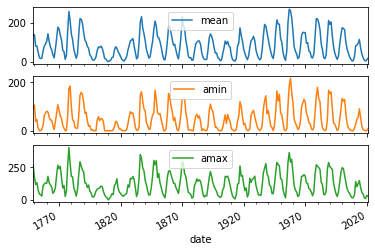

In [ ]:
df["total_sunspot"].resample("A").apply(['mean', np.min, np.max]).plot(subplots=True)

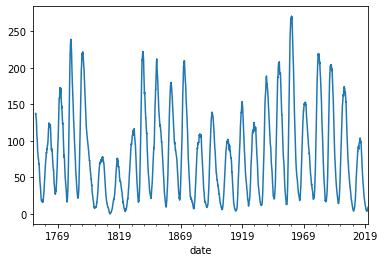

In [ ]:
df["total_sunspot"].rolling(window=24, center=False).mean().plot()

# Task 3

Split the data, for the modeling.

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.1, shuffle=False)

# Task 4

Fit a basic linear regression model on the data.

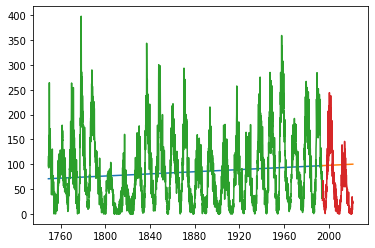

In [ ]:
from sklearn.linear_model import LinearRegression


lin_model= LinearRegression()

lin_model.fit(train_data.index.astype("int64").values.reshape(-1, 1),train_data["total_sunspot"].values)#

train_fit = lin_model.predict(train_data.index.astype("int64").values.reshape(-1, 1))
train_fit = pd.Series(train_fit)
train_fit.index =train_data.index

prediction = lin_model.predict(test_data.index.astype("int64").values.reshape(-1, 1))
prediction = pd.Series(prediction)
prediction.index =test_data.index


plt.plot(train_fit)
plt.plot(prediction)

plt.plot(train_data["total_sunspot"])

plt.plot(test_data["total_sunspot"])

plt.show()

# Task 5

Use an autoregressive model for forecasting, evaluate its performance! (ARIMA)

Note: using tqdm is an elegant thing, it automatically generates a progressbar based on the cycle ...

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from tqdm import tqdm

history = [x for x in list(train_data["total_sunspot"].values.astype("float"))]
predictions = list()

print("Predicting forward with ARIMA:\n")


for t in tqdm(range(len(list(test_data["total_sunspot"].values.astype("float"))))):
    # Initialize model
    model = ARIMA(history, order=(5,1,0))
    # Do Scikit-like mode.fit(), no bullshit output on stdout, please! 
    model_fit = model.fit(disp=0)
    # Forecast one time period
    output = model_fit.forecast()
    # Collect it
    yhat = output[0]
    predictions.append(yhat)
    
    #Step one further in time
    obs = list(test_data["total_sunspot"].values.astype("float"))[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


  0%|          | 0/327 [00:00<?, ?it/s]

Predicting forward with ARIMA:



  0%|          | 1/327 [00:00<01:18,  4.17it/s]

predicted=55.303092, expected=27.400000


  1%|          | 2/327 [00:00<01:21,  3.97it/s]

predicted=40.964501, expected=29.800000


  1%|          | 3/327 [00:00<01:25,  3.80it/s]

predicted=38.201217, expected=39.700000


  1%|          | 4/327 [00:01<01:29,  3.62it/s]

predicted=41.601969, expected=50.600000


  2%|▏         | 5/327 [00:01<01:31,  3.52it/s]

predicted=45.233525, expected=34.300000


  2%|▏         | 6/327 [00:01<01:32,  3.48it/s]

predicted=36.914922, expected=40.500000


  2%|▏         | 7/327 [00:02<01:35,  3.35it/s]

predicted=39.200648, expected=67.100000


  2%|▏         | 8/327 [00:02<01:35,  3.33it/s]

predicted=55.677318, expected=29.500000


  3%|▎         | 9/327 [00:02<01:36,  3.30it/s]

predicted=37.175035, expected=32.200000


  3%|▎         | 10/327 [00:02<01:33,  3.39it/s]

predicted=36.984162, expected=32.600000


  3%|▎         | 11/327 [00:03<01:35,  3.30it/s]

predicted=36.022641, expected=45.800000


  4%|▎         | 12/327 [00:03<01:34,  3.33it/s]

predicted=41.823734, expected=46.300000


  4%|▍         | 13/327 [00:03<01:34,  3.33it/s]

predicted=44.251768, expected=21.600000


  4%|▍         | 14/327 [00:04<01:36,  3.24it/s]

predicted=28.830000, expected=19.400000


  5%|▍         | 15/327 [00:04<01:34,  3.30it/s]

predicted=25.947733, expected=22.500000


  5%|▍         | 16/327 [00:04<01:34,  3.30it/s]

predicted=25.908454, expected=20.400000


  5%|▌         | 17/327 [00:05<01:34,  3.27it/s]

predicted=23.330739, expected=18.200000


  6%|▌         | 18/327 [00:05<01:33,  3.30it/s]

predicted=20.852012, expected=15.700000


  6%|▌         | 19/327 [00:05<01:34,  3.27it/s]

predicted=17.564834, expected=30.600000


  6%|▌         | 20/327 [00:05<01:34,  3.26it/s]

predicted=25.517880, expected=14.000000


  6%|▋         | 21/327 [00:06<01:31,  3.36it/s]

predicted=17.405301, expected=14.900000


  7%|▋         | 22/327 [00:06<01:33,  3.28it/s]

predicted=16.680943, expected=13.300000


  7%|▋         | 23/327 [00:06<01:32,  3.28it/s]

predicted=15.604869, expected=7.700000


  7%|▋         | 24/327 [00:07<01:30,  3.36it/s]

predicted=11.052828, expected=12.600000


  8%|▊         | 25/327 [00:07<01:37,  3.10it/s]

predicted=13.409767, expected=6.800000


  8%|▊         | 26/327 [00:07<01:35,  3.14it/s]

predicted=8.975272, expected=7.600000


  8%|▊         | 27/327 [00:08<01:32,  3.23it/s]

predicted=8.585716, expected=16.500000


  9%|▊         | 28/327 [00:08<01:33,  3.18it/s]

predicted=13.502658, expected=11.800000


  9%|▉         | 29/327 [00:08<01:29,  3.32it/s]

predicted=11.240482, expected=19.700000


  9%|▉         | 30/327 [00:09<01:27,  3.41it/s]

predicted=16.187721, expected=3.000000


  9%|▉         | 31/327 [00:09<01:25,  3.47it/s]

predicted=7.575262, expected=0.700000


 10%|▉         | 32/327 [00:09<01:24,  3.48it/s]

predicted=4.782633, expected=24.900000


 10%|█         | 33/327 [00:09<01:24,  3.49it/s]

predicted=18.251891, expected=14.000000


 10%|█         | 34/327 [00:10<01:23,  3.52it/s]

predicted=13.157763, expected=7.400000


 11%|█         | 35/327 [00:10<01:22,  3.52it/s]

predicted=9.668204, expected=11.000000


 11%|█         | 36/327 [00:10<01:24,  3.46it/s]

predicted=11.165331, expected=12.100000


 11%|█▏        | 37/327 [00:11<01:26,  3.37it/s]

predicted=11.470135, expected=23.000000


 12%|█▏        | 38/327 [00:11<01:26,  3.35it/s]

predicted=18.721236, expected=25.400000


 12%|█▏        | 39/327 [00:11<01:26,  3.34it/s]

predicted=20.978181, expected=20.800000


 12%|█▏        | 40/327 [00:11<01:26,  3.33it/s]

predicted=19.407874, expected=12.900000


 13%|█▎        | 41/327 [00:12<01:25,  3.33it/s]

predicted=15.776473, expected=35.700000


 13%|█▎        | 42/327 [00:12<01:24,  3.36it/s]

predicted=28.408891, expected=59.700000


 13%|█▎        | 43/327 [00:12<01:25,  3.34it/s]

predicted=44.918632, expected=32.800000


 13%|█▎        | 44/327 [00:13<01:25,  3.31it/s]

predicted=33.483961, expected=50.400000


 14%|█▍        | 45/327 [00:13<01:24,  3.32it/s]

predicted=44.089148, expected=55.500000


 14%|█▍        | 46/327 [00:13<01:26,  3.25it/s]

predicted=49.680729, expected=44.500000


 14%|█▍        | 47/327 [00:14<01:24,  3.30it/s]

predicted=45.305892, expected=50.200000


 15%|█▍        | 48/327 [00:14<01:24,  3.32it/s]

predicted=49.814334, expected=82.000000


 15%|█▍        | 49/327 [00:14<01:24,  3.28it/s]

predicted=67.592737, expected=70.600000


 15%|█▌        | 50/327 [00:15<01:26,  3.21it/s]

predicted=65.732525, expected=74.000000


 16%|█▌        | 51/327 [00:15<01:25,  3.23it/s]

predicted=69.551083, expected=90.500000


 16%|█▌        | 52/327 [00:15<01:23,  3.31it/s]

predicted=81.210761, expected=96.700000


 16%|█▌        | 53/327 [00:15<01:23,  3.30it/s]

predicted=87.773011, expected=121.100000


 17%|█▋        | 54/327 [00:16<01:21,  3.34it/s]

predicted=106.153850, expected=132.000000


 17%|█▋        | 55/327 [00:16<01:20,  3.37it/s]

predicted=117.193713, expected=78.500000


 17%|█▋        | 56/327 [00:16<01:19,  3.42it/s]

predicted=91.024769, expected=97.300000


 17%|█▋        | 57/327 [00:17<01:18,  3.43it/s]

predicted=99.898640, expected=119.200000


 18%|█▊        | 58/327 [00:17<01:19,  3.38it/s]

predicted=112.683475, expected=86.000000


 18%|█▊        | 59/327 [00:17<01:20,  3.31it/s]

predicted=94.583037, expected=98.000000


 18%|█▊        | 60/327 [00:17<01:18,  3.40it/s]

predicted=99.704016, expected=103.500000


 19%|█▊        | 61/327 [00:18<01:19,  3.34it/s]

predicted=100.887621, expected=93.600000


 19%|█▉        | 62/327 [00:18<01:18,  3.38it/s]

predicted=95.791280, expected=149.600000


 19%|█▉        | 63/327 [00:18<01:20,  3.29it/s]

predicted=128.832481, expected=207.200000


 20%|█▉        | 64/327 [00:19<01:19,  3.32it/s]

predicted=167.593182, expected=173.500000


 20%|█▉        | 65/327 [00:19<01:17,  3.36it/s]

predicted=160.233202, expected=142.300000


 20%|██        | 66/327 [00:19<01:17,  3.35it/s]

predicted=148.314596, expected=106.300000


 20%|██        | 67/327 [00:20<01:17,  3.36it/s]

predicted=127.425887, expected=168.700000


 21%|██        | 68/327 [00:20<01:15,  3.42it/s]

predicted=159.531530, expected=188.300000


 21%|██        | 69/327 [00:20<01:14,  3.44it/s]

predicted=174.665337, expected=116.800000


 21%|██▏       | 70/327 [00:20<01:15,  3.42it/s]

predicted=133.874631, expected=133.100000


 22%|██▏       | 71/327 [00:21<01:18,  3.24it/s]

predicted=139.119038, expected=165.700000


 22%|██▏       | 72/327 [00:21<01:18,  3.27it/s]

predicted=155.916070, expected=217.700000


 22%|██▏       | 73/327 [00:21<01:17,  3.29it/s]

predicted=189.421983, expected=191.500000


 23%|██▎       | 74/327 [00:22<01:16,  3.30it/s]

predicted=183.097316, expected=165.900000


 23%|██▎       | 75/327 [00:22<01:17,  3.27it/s]

predicted=169.351831, expected=188.000000


 23%|██▎       | 76/327 [00:22<01:16,  3.30it/s]

predicted=184.466491, expected=244.300000


 24%|██▎       | 77/327 [00:23<01:15,  3.30it/s]

predicted=219.313352, expected=180.500000


 24%|██▍       | 78/327 [00:23<01:16,  3.27it/s]

predicted=190.074133, expected=156.000000


 24%|██▍       | 79/327 [00:23<01:17,  3.21it/s]

predicted=172.966416, expected=141.600000


 24%|██▍       | 80/327 [00:24<01:16,  3.22it/s]

predicted=160.926201, expected=158.100000


 25%|██▍       | 81/327 [00:24<01:15,  3.26it/s]

predicted=163.725584, expected=143.300000


 25%|██▌       | 82/327 [00:24<01:15,  3.26it/s]

predicted=153.734943, expected=142.600000


 25%|██▌       | 83/327 [00:24<01:14,  3.28it/s]

predicted=146.804796, expected=121.500000


 26%|██▌       | 84/327 [00:25<01:12,  3.36it/s]

predicted=132.675401, expected=165.800000


 26%|██▌       | 85/327 [00:25<01:12,  3.35it/s]

predicted=154.342448, expected=161.700000


 26%|██▋       | 86/327 [00:25<01:11,  3.36it/s]

predicted=155.570673, expected=142.100000


 27%|██▋       | 87/327 [00:26<01:10,  3.40it/s]

predicted=144.595143, expected=202.900000


 27%|██▋       | 88/327 [00:26<01:08,  3.49it/s]

predicted=181.113398, expected=123.000000


 27%|██▋       | 89/327 [00:26<01:08,  3.50it/s]

predicted=140.187016, expected=161.500000


 28%|██▊       | 90/327 [00:26<01:08,  3.47it/s]

predicted=158.940131, expected=238.200000


 28%|██▊       | 91/327 [00:27<01:08,  3.45it/s]

predicted=205.908594, expected=194.100000


 28%|██▊       | 92/327 [00:27<01:10,  3.35it/s]

predicted=186.574669, expected=176.600000


 28%|██▊       | 93/327 [00:27<01:11,  3.29it/s]

predicted=182.315851, expected=213.400000


 29%|██▊       | 94/327 [00:28<01:11,  3.25it/s]

predicted=202.165069, expected=184.600000


 29%|██▉       | 95/327 [00:28<01:10,  3.31it/s]

predicted=189.181210, expected=170.200000


 29%|██▉       | 96/327 [00:28<01:07,  3.41it/s]

predicted=181.899183, expected=147.100000


 30%|██▉       | 97/327 [00:29<01:08,  3.36it/s]

predicted=164.173216, expected=186.900000


 30%|██▉       | 98/327 [00:29<01:08,  3.34it/s]

predicted=180.877626, expected=187.500000


 30%|███       | 99/327 [00:29<01:09,  3.28it/s]

predicted=183.223549, expected=128.800000


 31%|███       | 100/327 [00:29<01:07,  3.37it/s]

predicted=148.332173, expected=161.000000


 31%|███       | 101/327 [00:30<01:05,  3.44it/s]

predicted=162.381864, expected=175.600000


 31%|███       | 102/327 [00:30<01:06,  3.39it/s]

predicted=169.299379, expected=187.900000


 31%|███▏      | 103/327 [00:30<01:05,  3.42it/s]

predicted=177.822437, expected=151.200000


 32%|███▏      | 104/327 [00:31<01:05,  3.40it/s]

predicted=160.124917, expected=147.200000


 32%|███▏      | 105/327 [00:31<01:04,  3.45it/s]

predicted=154.120084, expected=135.300000


 32%|███▏      | 106/327 [00:31<01:04,  3.42it/s]

predicted=146.825389, expected=133.500000


 33%|███▎      | 107/327 [00:31<01:04,  3.42it/s]

predicted=141.619223, expected=75.700000


 33%|███▎      | 108/327 [00:32<01:04,  3.40it/s]

predicted=105.258191, expected=100.700000


 33%|███▎      | 109/327 [00:32<01:04,  3.36it/s]

predicted=109.309164, expected=97.900000


 34%|███▎      | 110/327 [00:32<01:04,  3.35it/s]

predicted=104.052626, expected=86.800000


 34%|███▍      | 111/327 [00:33<01:05,  3.31it/s]

predicted=93.051486, expected=118.700000


 34%|███▍      | 112/327 [00:33<01:04,  3.35it/s]

predicted=110.120648, expected=128.300000


 35%|███▍      | 113/327 [00:33<01:02,  3.42it/s]

predicted=115.827898, expected=115.400000


 35%|███▍      | 114/327 [00:34<01:03,  3.37it/s]

predicted=112.803396, expected=78.500000


 35%|███▌      | 115/327 [00:34<01:02,  3.42it/s]

predicted=93.289119, expected=97.800000


 35%|███▌      | 116/327 [00:34<01:02,  3.37it/s]

predicted=100.559935, expected=82.900000


 36%|███▌      | 117/327 [00:34<01:02,  3.37it/s]

predicted=91.454163, expected=72.200000


 36%|███▌      | 118/327 [00:35<01:05,  3.21it/s]

predicted=81.636367, expected=60.600000


 36%|███▋      | 119/327 [00:35<01:05,  3.20it/s]

predicted=71.821151, expected=74.600000


 37%|███▋      | 120/327 [00:35<01:03,  3.25it/s]

predicted=74.691719, expected=74.800000


 37%|███▋      | 121/327 [00:36<01:03,  3.24it/s]

predicted=74.757777, expected=59.200000


 37%|███▋      | 122/327 [00:36<01:01,  3.31it/s]

predicted=64.577302, expected=72.800000


 38%|███▊      | 123/327 [00:36<01:01,  3.33it/s]

predicted=71.019886, expected=66.500000


 38%|███▊      | 124/327 [00:37<01:00,  3.34it/s]

predicted=67.328215, expected=83.800000


 38%|███▊      | 125/327 [00:37<01:00,  3.33it/s]

predicted=77.256189, expected=69.700000


 39%|███▊      | 126/327 [00:37<00:59,  3.40it/s]

predicted=71.219381, expected=48.800000


 39%|███▉      | 127/327 [00:37<00:58,  3.41it/s]

predicted=58.064417, expected=74.200000


 39%|███▉      | 128/327 [00:38<00:59,  3.35it/s]

predicted=71.304184, expected=70.100000


 39%|███▉      | 129/327 [00:38<00:59,  3.31it/s]

predicted=68.769038, expected=28.900000


 40%|███▉      | 130/327 [00:38<01:00,  3.27it/s]

predicted=45.064489, expected=48.100000


 40%|████      | 131/327 [00:39<01:01,  3.20it/s]

predicted=51.903344, expected=43.500000


 40%|████      | 132/327 [00:39<00:59,  3.28it/s]

predicted=46.794782, expected=39.600000


 41%|████      | 133/327 [00:39<00:56,  3.41it/s]

predicted=43.018098, expected=38.700000


 41%|████      | 134/327 [00:40<00:56,  3.42it/s]

predicted=41.611865, expected=61.900000


 41%|████▏     | 135/327 [00:40<00:55,  3.46it/s]

predicted=52.572256, expected=56.800000


 42%|████▏     | 136/327 [00:40<00:56,  3.40it/s]

predicted=52.790358, expected=62.400000


 42%|████▏     | 137/327 [00:40<00:56,  3.36it/s]

predicted=57.247504, expected=60.500000


 42%|████▏     | 138/327 [00:41<00:56,  3.37it/s]

predicted=58.381375, expected=37.200000


 43%|████▎     | 139/327 [00:41<00:56,  3.35it/s]

predicted=45.477709, expected=13.200000


 43%|████▎     | 140/327 [00:41<00:55,  3.37it/s]

predicted=30.233701, expected=27.500000


 43%|████▎     | 141/327 [00:42<00:57,  3.25it/s]

predicted=33.166886, expected=59.300000


 43%|████▎     | 142/327 [00:42<00:56,  3.25it/s]

predicted=48.945082, expected=20.900000


 44%|████▎     | 143/327 [00:42<00:56,  3.28it/s]

predicted=28.212215, expected=5.700000


 44%|████▍     | 144/327 [00:43<00:55,  3.29it/s]

predicted=17.118203, expected=17.300000


 44%|████▍     | 145/327 [00:43<00:55,  3.26it/s]

predicted=20.677963, expected=50.300000


 45%|████▍     | 146/327 [00:43<00:55,  3.27it/s]

predicted=37.978388, expected=37.200000


 45%|████▍     | 147/327 [00:44<00:56,  3.20it/s]

predicted=34.112142, expected=24.500000


 45%|████▌     | 148/327 [00:44<00:56,  3.18it/s]

predicted=26.811860, expected=22.200000


 46%|████▌     | 149/327 [00:44<00:55,  3.20it/s]

predicted=25.643700, expected=20.800000


 46%|████▌     | 150/327 [00:44<00:54,  3.28it/s]

predicted=23.932154, expected=23.700000


 46%|████▌     | 151/327 [00:45<00:54,  3.24it/s]

predicted=25.316156, expected=14.900000


 46%|████▋     | 152/327 [00:45<00:54,  3.19it/s]

predicted=18.877130, expected=35.700000


 47%|████▋     | 153/327 [00:45<00:53,  3.25it/s]

predicted=29.309901, expected=22.300000


 47%|████▋     | 154/327 [00:46<00:53,  3.24it/s]

predicted=23.154908, expected=29.300000


 47%|████▋     | 155/327 [00:46<00:52,  3.28it/s]

predicted=26.875703, expected=18.400000


 48%|████▊     | 156/327 [00:46<00:50,  3.37it/s]

predicted=21.951508, expected=7.200000


 48%|████▊     | 157/327 [00:47<00:51,  3.30it/s]

predicted=13.779520, expected=5.400000


 48%|████▊     | 158/327 [00:47<00:51,  3.28it/s]

predicted=11.716603, expected=19.500000


 49%|████▊     | 159/327 [00:47<00:50,  3.30it/s]

predicted=17.007350, expected=21.300000


 49%|████▉     | 160/327 [00:48<00:50,  3.32it/s]

predicted=18.353321, expected=15.100000


 49%|████▉     | 161/327 [00:48<00:48,  3.39it/s]

predicted=15.085833, expected=9.800000


 50%|████▉     | 162/327 [00:48<00:47,  3.44it/s]

predicted=12.171376, expected=4.000000


 50%|████▉     | 163/327 [00:48<00:46,  3.52it/s]

predicted=8.190491, expected=1.500000


 50%|█████     | 164/327 [00:49<00:48,  3.39it/s]

predicted=5.777229, expected=2.800000


 50%|█████     | 165/327 [00:49<00:46,  3.46it/s]

predicted=4.979882, expected=17.300000


 51%|█████     | 166/327 [00:49<00:48,  3.30it/s]

predicted=12.183238, expected=4.100000


 51%|█████     | 167/327 [00:50<00:48,  3.30it/s]

predicted=5.508980, expected=2.900000


 51%|█████▏    | 168/327 [00:50<00:47,  3.31it/s]

predicted=4.403557, expected=15.500000


 52%|█████▏    | 169/327 [00:50<00:47,  3.29it/s]

predicted=11.697855, expected=3.600000


 52%|█████▏    | 170/327 [00:50<00:46,  3.34it/s]

predicted=5.407212, expected=4.600000


 52%|█████▏    | 171/327 [00:51<00:45,  3.40it/s]

predicted=6.045341, expected=5.200000


 53%|█████▎    | 172/327 [00:51<00:45,  3.40it/s]

predicted=5.804351, expected=0.600000


 53%|█████▎    | 173/327 [00:51<00:45,  3.35it/s]

predicted=2.503225, expected=0.300000


 53%|█████▎    | 174/327 [00:52<00:45,  3.39it/s]

predicted=2.208181, expected=1.200000


 54%|█████▎    | 175/327 [00:52<00:44,  3.38it/s]

predicted=1.650963, expected=4.200000


 54%|█████▍    | 176/327 [00:52<00:44,  3.39it/s]

predicted=3.088175, expected=6.600000


 54%|█████▍    | 177/327 [00:53<00:46,  3.21it/s]

predicted=4.750364, expected=1.000000


 54%|█████▍    | 178/327 [00:53<00:44,  3.33it/s]

predicted=1.875039, expected=1.300000


 55%|█████▍    | 179/327 [00:53<00:45,  3.27it/s]

predicted=1.959789, expected=1.200000


 55%|█████▌    | 180/327 [00:53<00:44,  3.34it/s]

predicted=1.796249, expected=0.600000


 55%|█████▌    | 181/327 [00:54<00:42,  3.40it/s]

predicted=1.160401, expected=1.200000


 56%|█████▌    | 182/327 [00:54<00:42,  3.38it/s]

predicted=1.376952, expected=2.900000


 56%|█████▌    | 183/327 [00:54<00:42,  3.39it/s]

predicted=2.056540, expected=6.300000


 56%|█████▋    | 184/327 [00:55<00:43,  3.29it/s]

predicted=4.251693, expected=5.500000


 57%|█████▋    | 185/327 [00:55<00:43,  3.28it/s]

predicted=4.383770, expected=0.000000


 57%|█████▋    | 186/327 [00:55<00:44,  3.20it/s]

predicted=1.582062, expected=7.100000


 57%|█████▋    | 187/327 [00:56<00:42,  3.30it/s]

predicted=5.453647, expected=7.700000


 57%|█████▋    | 188/327 [00:56<00:42,  3.26it/s]

predicted=6.238944, expected=6.900000


 58%|█████▊    | 189/327 [00:56<00:41,  3.34it/s]

predicted=6.151709, expected=16.300000


 58%|█████▊    | 190/327 [00:56<00:40,  3.40it/s]

predicted=12.065691, expected=19.500000


 58%|█████▊    | 191/327 [00:57<00:39,  3.43it/s]

predicted=14.979682, expected=28.500000


 59%|█████▊    | 192/327 [00:57<00:39,  3.42it/s]

predicted=21.899426, expected=24.000000


 59%|█████▉    | 193/327 [00:57<00:38,  3.46it/s]

predicted=21.610391, expected=10.400000


 59%|█████▉    | 194/327 [00:58<00:40,  3.30it/s]

predicted=14.696870, expected=13.900000


 60%|█████▉    | 195/327 [00:58<00:40,  3.28it/s]

predicted=16.294829, expected=18.800000


 60%|█████▉    | 196/327 [00:58<00:40,  3.26it/s]

predicted=18.293790, expected=25.200000


 60%|██████    | 197/327 [00:59<00:39,  3.30it/s]

predicted=21.901419, expected=29.600000


 61%|██████    | 198/327 [00:59<00:39,  3.24it/s]

predicted=25.261087, expected=36.400000


 61%|██████    | 199/327 [00:59<00:40,  3.17it/s]

predicted=30.236394, expected=33.600000


 61%|██████    | 200/327 [01:00<00:38,  3.29it/s]

predicted=30.889277, expected=34.400000


 61%|██████▏   | 201/327 [01:00<00:37,  3.35it/s]

predicted=32.696361, expected=24.500000


 62%|██████▏   | 202/327 [01:00<00:37,  3.30it/s]

predicted=27.973465, expected=27.300000


 62%|██████▏   | 203/327 [01:00<00:36,  3.40it/s]

predicted=28.770031, expected=48.300000


 62%|██████▏   | 204/327 [01:01<00:35,  3.43it/s]

predicted=40.737252, expected=78.600000


 63%|██████▎   | 205/327 [01:01<00:35,  3.39it/s]

predicted=60.030647, expected=76.100000


 63%|██████▎   | 206/327 [01:01<00:34,  3.48it/s]

predicted=64.140823, expected=58.200000


 63%|██████▎   | 207/327 [01:02<00:34,  3.48it/s]

predicted=58.076750, expected=56.100000


 64%|██████▎   | 208/327 [01:02<00:33,  3.54it/s]

predicted=58.617104, expected=64.500000


 64%|██████▍   | 209/327 [01:02<00:33,  3.56it/s]

predicted=63.682172, expected=65.800000


 64%|██████▍   | 210/327 [01:02<00:33,  3.47it/s]

predicted=65.035359, expected=120.100000


 65%|██████▍   | 211/327 [01:03<00:32,  3.55it/s]

predicted=96.685027, expected=125.700000


 65%|██████▍   | 212/327 [01:03<00:32,  3.54it/s]

predicted=106.171872, expected=139.100000


 65%|██████▌   | 213/327 [01:03<00:32,  3.56it/s]

predicted=120.430070, expected=109.300000


 65%|██████▌   | 214/327 [01:03<00:31,  3.60it/s]

predicted=111.148507, expected=94.400000


 66%|██████▌   | 215/327 [01:04<00:31,  3.53it/s]

predicted=103.059557, expected=47.800000


 66%|██████▌   | 216/327 [01:04<00:31,  3.57it/s]

predicted=75.838733, expected=86.600000


 66%|██████▋   | 217/327 [01:04<00:31,  3.49it/s]

predicted=89.546513, expected=85.900000


 67%|██████▋   | 218/327 [01:05<00:31,  3.48it/s]

predicted=87.244271, expected=96.500000


 67%|██████▋   | 219/327 [01:05<00:31,  3.40it/s]

predicted=90.028258, expected=92.000000


 67%|██████▋   | 220/327 [01:05<00:31,  3.44it/s]

predicted=89.784049, expected=100.100000


 68%|██████▊   | 221/327 [01:06<00:30,  3.48it/s]

predicted=93.674136, expected=94.800000


 68%|██████▊   | 222/327 [01:06<00:30,  3.39it/s]

predicted=94.472824, expected=93.700000


 68%|██████▊   | 223/327 [01:06<00:30,  3.46it/s]

predicted=93.907154, expected=76.500000


 69%|██████▊   | 224/327 [01:06<00:29,  3.49it/s]

predicted=84.478046, expected=87.600000


 69%|██████▉   | 225/327 [01:07<00:29,  3.45it/s]

predicted=88.369537, expected=56.800000


 69%|██████▉   | 226/327 [01:07<00:29,  3.39it/s]

predicted=70.131459, expected=96.100000


 69%|██████▉   | 227/327 [01:07<00:28,  3.46it/s]

predicted=88.490121, expected=60.900000


 70%|██████▉   | 228/327 [01:08<00:28,  3.51it/s]

predicted=69.950029, expected=78.300000


 70%|███████   | 229/327 [01:08<00:27,  3.50it/s]

predicted=75.984409, expected=107.300000


 70%|███████   | 230/327 [01:08<00:29,  3.33it/s]

predicted=95.102826, expected=120.200000


 71%|███████   | 231/327 [01:08<00:28,  3.34it/s]

predicted=103.821630, expected=76.700000


 71%|███████   | 232/327 [01:09<00:28,  3.37it/s]

predicted=85.488320, expected=86.200000


 71%|███████▏  | 233/327 [01:09<00:27,  3.41it/s]

predicted=88.669023, expected=91.800000


 72%|███████▏  | 234/327 [01:09<00:27,  3.42it/s]

predicted=92.358555, expected=54.500000


 72%|███████▏  | 235/327 [01:10<00:27,  3.39it/s]

predicted=69.909522, expected=114.400000


 72%|███████▏  | 236/327 [01:10<00:26,  3.47it/s]

predicted=101.202563, expected=113.900000


 72%|███████▏  | 237/327 [01:10<00:26,  3.38it/s]

predicted=102.588657, expected=124.200000


 73%|███████▎  | 238/327 [01:10<00:25,  3.42it/s]

predicted=111.384646, expected=117.000000


 73%|███████▎  | 239/327 [01:11<00:25,  3.42it/s]

predicted=113.339688, expected=146.100000


 73%|███████▎  | 240/327 [01:11<00:25,  3.44it/s]

predicted=130.433697, expected=128.700000


 74%|███████▎  | 241/327 [01:11<00:25,  3.41it/s]

predicted=127.744402, expected=112.500000


 74%|███████▍  | 242/327 [01:12<00:24,  3.41it/s]

predicted=118.647561, expected=112.500000


 74%|███████▍  | 243/327 [01:12<00:24,  3.43it/s]

predicted=118.389614, expected=102.900000


 75%|███████▍  | 244/327 [01:12<00:23,  3.50it/s]

predicted=110.074636, expected=100.200000


 75%|███████▍  | 245/327 [01:13<00:23,  3.53it/s]

predicted=106.870702, expected=106.900000


 75%|███████▌  | 246/327 [01:13<00:23,  3.50it/s]

predicted=107.857927, expected=130.000000


 76%|███████▌  | 247/327 [01:13<00:23,  3.41it/s]

predicted=119.918118, expected=90.000000


 76%|███████▌  | 248/327 [01:13<00:23,  3.42it/s]

predicted=99.266322, expected=103.600000


 76%|███████▌  | 249/327 [01:14<00:23,  3.37it/s]

predicted=104.713209, expected=112.900000


 76%|███████▋  | 250/327 [01:14<00:22,  3.44it/s]

predicted=110.315279, expected=93.000000


 77%|███████▋  | 251/327 [01:14<00:22,  3.39it/s]

predicted=98.308286, expected=66.700000


 77%|███████▋  | 252/327 [01:15<00:21,  3.44it/s]

predicted=82.832843, expected=54.500000


 77%|███████▋  | 253/327 [01:15<00:21,  3.48it/s]

predicted=69.598372, expected=75.300000


 78%|███████▊  | 254/327 [01:15<00:21,  3.47it/s]

predicted=76.951090, expected=88.800000


 78%|███████▊  | 255/327 [01:15<00:20,  3.48it/s]

predicted=83.282872, expected=66.500000


 78%|███████▊  | 256/327 [01:16<00:20,  3.50it/s]

predicted=70.371266, expected=65.800000


 79%|███████▊  | 257/327 [01:16<00:20,  3.43it/s]

predicted=68.696312, expected=64.400000


 79%|███████▉  | 258/327 [01:16<00:20,  3.35it/s]

predicted=67.027540, expected=78.600000


 79%|███████▉  | 259/327 [01:17<00:20,  3.36it/s]

predicted=74.612524, expected=63.600000


 80%|███████▉  | 260/327 [01:17<00:20,  3.32it/s]

predicted=67.302170, expected=62.200000


 80%|███████▉  | 261/327 [01:17<00:20,  3.23it/s]

predicted=64.551433, expected=58.000000


 80%|████████  | 262/327 [01:18<00:20,  3.11it/s]

predicted=61.834153, expected=57.000000


 80%|████████  | 263/327 [01:18<00:19,  3.21it/s]

predicted=59.524027, expected=56.400000


 81%|████████  | 264/327 [01:18<00:19,  3.18it/s]

predicted=58.824477, expected=54.100000


 81%|████████  | 265/327 [01:19<00:19,  3.25it/s]

predicted=55.904111, expected=37.900000


 81%|████████▏ | 266/327 [01:19<00:18,  3.24it/s]

predicted=45.751572, expected=51.500000


 82%|████████▏ | 267/327 [01:19<00:18,  3.27it/s]

predicted=51.225475, expected=20.500000


 82%|████████▏ | 268/327 [01:19<00:18,  3.23it/s]

predicted=32.799834, expected=32.400000


 82%|████████▏ | 269/327 [01:20<00:17,  3.26it/s]

predicted=35.644962, expected=50.200000


 83%|████████▎ | 270/327 [01:20<00:17,  3.30it/s]

predicted=45.106644, expected=44.600000


 83%|████████▎ | 271/327 [01:20<00:17,  3.29it/s]

predicted=41.416001, expected=33.400000


 83%|████████▎ | 272/327 [01:21<00:16,  3.31it/s]

predicted=36.837930, expected=21.400000


 83%|████████▎ | 273/327 [01:21<00:16,  3.28it/s]

predicted=28.308783, expected=18.500000


 84%|████████▍ | 274/327 [01:21<00:15,  3.33it/s]

predicted=24.935085, expected=26.100000


 84%|████████▍ | 275/327 [01:22<00:15,  3.29it/s]

predicted=27.620361, expected=26.400000


 84%|████████▍ | 276/327 [01:22<00:15,  3.31it/s]

predicted=26.418487, expected=17.700000


 85%|████████▍ | 277/327 [01:22<00:14,  3.36it/s]

predicted=20.665893, expected=32.300000


 85%|████████▌ | 278/327 [01:22<00:14,  3.28it/s]

predicted=28.146865, expected=18.900000


 85%|████████▌ | 279/327 [01:23<00:15,  3.18it/s]

predicted=21.315370, expected=19.200000


 86%|████████▌ | 280/327 [01:23<00:14,  3.32it/s]

predicted=20.919444, expected=17.800000


 86%|████████▌ | 281/327 [01:23<00:13,  3.37it/s]

predicted=20.024438, expected=32.600000


 86%|████████▌ | 282/327 [01:24<00:13,  3.25it/s]

predicted=27.183522, expected=43.700000


 87%|████████▋ | 283/327 [01:24<00:13,  3.35it/s]

predicted=35.714917, expected=13.200000


 87%|████████▋ | 284/327 [01:24<00:13,  3.28it/s]

predicted=19.652488, expected=5.700000


 87%|████████▋ | 285/327 [01:25<00:12,  3.25it/s]

predicted=14.238614, expected=8.200000


 87%|████████▋ | 286/327 [01:25<00:12,  3.35it/s]

predicted=13.468258, expected=6.800000


 88%|████████▊ | 287/327 [01:25<00:11,  3.35it/s]

predicted=10.416011, expected=10.700000


 88%|████████▊ | 288/327 [01:25<00:11,  3.42it/s]

predicted=11.550094, expected=2.500000


 88%|████████▊ | 289/327 [01:26<00:11,  3.45it/s]

predicted=5.173662, expected=8.900000


 89%|████████▊ | 290/327 [01:26<00:10,  3.42it/s]

predicted=7.824387, expected=13.100000


 89%|████████▉ | 291/327 [01:26<00:10,  3.30it/s]

predicted=10.738748, expected=15.600000


 89%|████████▉ | 292/327 [01:27<00:10,  3.25it/s]

predicted=12.536040, expected=1.600000


 90%|████████▉ | 293/327 [01:27<00:10,  3.34it/s]

predicted=5.631723, expected=8.700000


 90%|████████▉ | 294/327 [01:27<00:10,  3.30it/s]

predicted=8.551781, expected=3.300000


 90%|█████████ | 295/327 [01:28<00:09,  3.33it/s]

predicted=5.674774, expected=4.900000


 91%|█████████ | 296/327 [01:28<00:09,  3.34it/s]

predicted=5.582197, expected=4.900000


 91%|█████████ | 297/327 [01:28<00:09,  3.28it/s]

predicted=5.603800, expected=3.100000


 91%|█████████ | 298/327 [01:28<00:08,  3.32it/s]

predicted=3.559062, expected=7.700000


 91%|█████████▏| 299/327 [01:29<00:08,  3.35it/s]

predicted=6.436594, expected=0.800000


 92%|█████████▏| 300/327 [01:29<00:08,  3.36it/s]

predicted=2.493791, expected=9.400000


 92%|█████████▏| 301/327 [01:29<00:07,  3.41it/s]

predicted=7.074723, expected=9.100000


 92%|█████████▏| 302/327 [01:30<00:07,  3.30it/s]

predicted=7.644537, expected=9.900000


 93%|█████████▎| 303/327 [01:30<00:07,  3.28it/s]

predicted=8.265938, expected=1.200000


 93%|█████████▎| 304/327 [01:30<00:06,  3.30it/s]

predicted=4.145180, expected=0.900000


 93%|█████████▎| 305/327 [01:31<00:06,  3.18it/s]

predicted=2.893126, expected=0.500000


 94%|█████████▎| 306/327 [01:31<00:06,  3.24it/s]

predicted=2.379331, expected=1.100000


 94%|█████████▍| 307/327 [01:31<00:06,  3.30it/s]

predicted=1.774713, expected=0.400000


 94%|█████████▍| 308/327 [01:31<00:05,  3.36it/s]

predicted=1.089545, expected=0.500000


 94%|█████████▍| 309/327 [01:32<00:05,  3.38it/s]

predicted=0.538080, expected=1.500000


 95%|█████████▍| 310/327 [01:32<00:05,  3.06it/s]

predicted=1.095276, expected=6.200000


 95%|█████████▌| 311/327 [01:32<00:05,  3.16it/s]

predicted=3.898678, expected=0.200000


 95%|█████████▌| 312/327 [01:33<00:04,  3.26it/s]

predicted=1.057819, expected=1.500000


 96%|█████████▌| 313/327 [01:33<00:04,  3.28it/s]

predicted=1.632163, expected=5.200000


 96%|█████████▌| 314/327 [01:33<00:03,  3.34it/s]

predicted=3.893605, expected=0.200000


 96%|█████████▋| 315/327 [01:34<00:03,  3.37it/s]

predicted=1.151350, expected=5.800000


 97%|█████████▋| 316/327 [01:34<00:03,  3.41it/s]

predicted=4.395833, expected=6.100000


 97%|█████████▋| 317/327 [01:34<00:02,  3.43it/s]

predicted=4.804399, expected=7.500000


 97%|█████████▋| 318/327 [01:35<00:02,  3.39it/s]

predicted=5.907533, expected=0.600000


 98%|█████████▊| 319/327 [01:35<00:02,  3.38it/s]

predicted=2.677318, expected=14.600000


 98%|█████████▊| 320/327 [01:35<00:02,  3.32it/s]

predicted=10.126675, expected=34.500000


 98%|█████████▊| 321/327 [01:35<00:01,  3.26it/s]

predicted=23.246758, expected=23.100000


 98%|█████████▊| 322/327 [01:36<00:01,  3.25it/s]

predicted=19.631741, expected=10.400000


 99%|█████████▉| 323/327 [01:36<00:01,  3.21it/s]

predicted=14.051810, expected=8.300000


 99%|█████████▉| 324/327 [01:36<00:00,  3.28it/s]

predicted=12.368999, expected=17.300000


 99%|█████████▉| 325/327 [01:37<00:00,  3.35it/s]

predicted=16.595063, expected=24.500000


100%|█████████▉| 326/327 [01:37<00:00,  3.28it/s]

predicted=21.149849, expected=21.200000


100%|██████████| 327/327 [01:37<00:00,  3.34it/s]

predicted=19.543732, expected=25.400000


In [ ]:
from sklearn.metrics import mean_absolute_error, explained_variance_score
errors = np.array(test_data["total_sunspot"].values)-np.array(predictions)

print()
print("Mean abs error:",mean_absolute_error(test_data["total_sunspot"].values,predictions))
print("Explained variance:",explained_variance_score(test_data["total_sunspot"].values,predictions))

predictions = pd.Series(predictions)
predictions.index =test_data.index    

plt.plot(predictions, label="Prediction")

#plt.plot(train_data["total_sunspot"], label="Train")

plt.plot(test_data["total_sunspot"], label="Test")
plt.legend()
plt.show()

NameError: ignored

# Task 6

Apply complex modeling method, maximize predictive performance!

“Make a rolling window after shifting the variable by 1 to have X and y” is a very frustrating activity by manually. This should not be done manually, not least because of possible sources of error.

This is where seglearn comes into, which does it all for us.

In [ ]:
!pip install seglearn

     |████████████████████████████████| 11.3 MB 143 kB/s 


In [ ]:
TIME_WINDOW=30
FORECAST_DISTANCE=1

In [ ]:
from seglearn.transform import SegmentXYForecast, last

In [ ]:
from sklearn.ensemble import RandomForestRegressor

N_ESTIMATORS = 30
RANDOM_STATE = 452543634